In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np
import lbg_forecast.nz_sim as nz
import lbg_forecast.emulator as em
import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools
import lbg_forecast.popmodel as pop
import matplotlib.pyplot as plt

2023-12-13 16:39:34.346611: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-13 16:39:34.346633: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-13 16:39:34.346641: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-13 16:39:34.346671: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-13 16:39:34.346690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# initalise fsps emulator
model = em.fsps_emulator()
sps_params = model._sps_params

In [4]:
# nz histogram parameters
dz = 0.1
minz = 0.0
maxz = 7.0

bins = np.arange(minz, maxz, dz)

In [5]:
bounds = hyp.define_hyperparameter_bounds(   

    zred = np.array([0, 0, 7]),
    logtage = np.array([1, -3, 1]),
    logzsol = np.array([1, -2.5, 0.5]),
    dust1 = np.array([1, 0, 2]),
    dust2 = np.array([1, 0, 2]),
    igm_factor = np.array([0, 1, 1]), 
    gas_logu = np.array([1, -4, -1]),
    logfagn = np.array([1, 0, 10]),
    imf1 = np.array([0, 1.3, 1.3]), 
    imf2 = np.array([0, 2.3, 2.3]), 
    imf3 = np.array([0, 2.3, 2.3]), 
    logtau = np.array([1, -4, 1]),
    loga = np.array([1, -3, 3]),
    logb = np.array([1, -3, 3]),
    logmass = np.array([0, 7, 13])
    
)

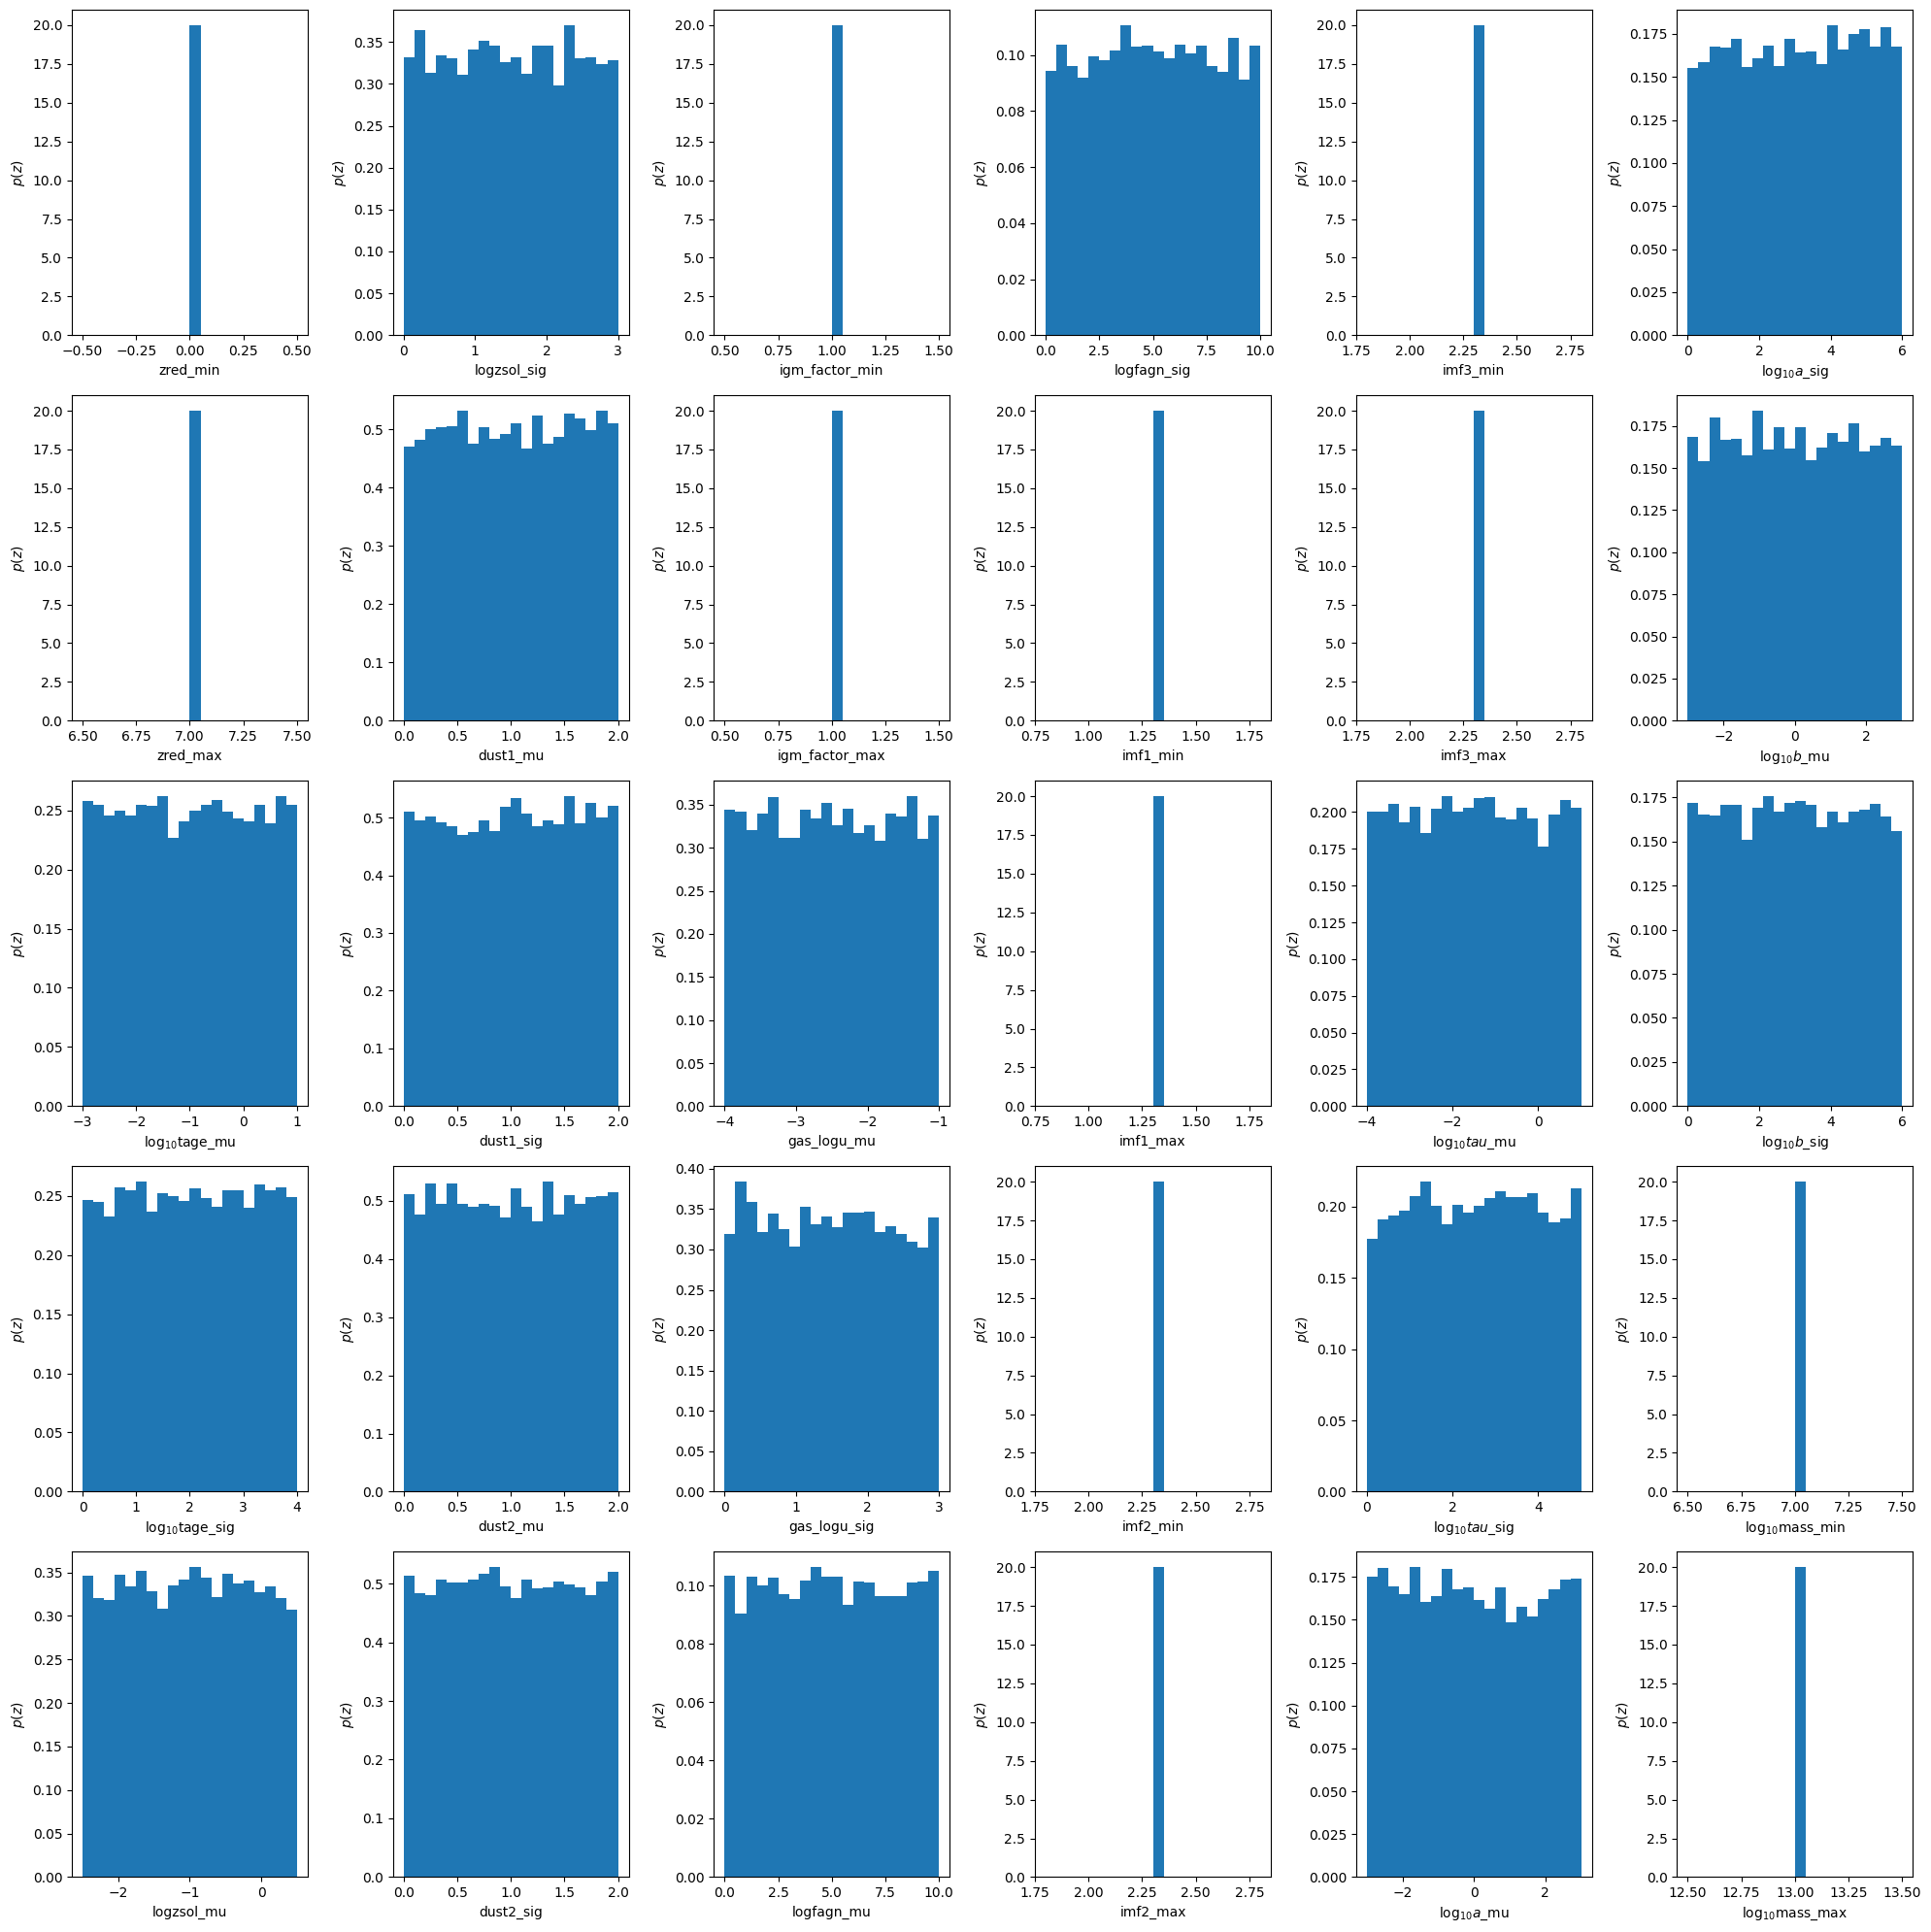

In [6]:
hyp.plot_hyperparameters(10000, bounds)

In [7]:
hyperparams = []
nsamples = 2
h = 0
while(h < nsamples):
    hyperparams.append(hyp.sample_hyper_parameters(bounds))
    h+=1

hyperparams = np.asanyarray(hyperparams)
#hyperparams[i] gives hyparams for realisation i

In [8]:
g = 0
nz_data = []
while(g<nsamples):
    sps_params = pop.galaxy_population_model_vec(hyperparams[g], 100000)
    nzs = nz.simulate_nzs(sps_params, model, bins)
    nz_data.append(nzs)
    g+=1

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


In [9]:
hyperparams[0]

array([[array([0., 0., 7.]), 0.0, 7.0],
       [array([ 1., -3.,  1.]), -1.7542702699527313, 3.265277352350732],
       [array([ 1. , -2.5,  0.5]), 0.28757435241487705,
        0.14532702407318807],
       [array([1., 0., 2.]), 0.7304687521357269, 0.8761158620249111],
       [array([1., 0., 2.]), 0.41474344947218933, 0.5967869673714464],
       [array([0., 1., 1.]), 1.0, 1.0],
       [array([ 1., -4., -1.]), -3.924786771049938, 1.2069378129414903],
       [array([ 1.,  0., 10.]), 1.2215919341726411, 5.604741087560566],
       [array([0. , 1.3, 1.3]), 1.3, 1.3],
       [array([0. , 2.3, 2.3]), 2.3, 2.3],
       [array([0. , 2.3, 2.3]), 2.3, 2.3],
       [array([ 1., -4.,  1.]), -1.1885978108545032, 3.526396170397078],
       [array([ 1., -3.,  3.]), -2.4836845361035245, 5.614034760788052],
       [array([ 1., -3.,  3.]), -2.641240505178038, 0.6803270738636146],
       [array([ 0.,  7., 13.]), 7.0, 13.0]], dtype=object)

<BarContainer object of 69 artists>

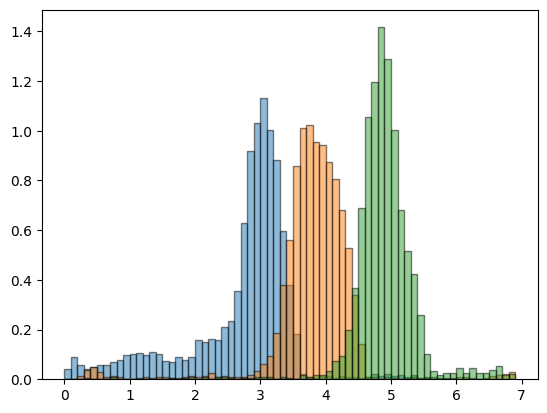

In [10]:
realisation = 0
plt.bar(bins[:-1], nz_data[realisation][0], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nz_data[realisation][1], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nz_data[realisation][2], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)

In [11]:
nz_data[realisation][0]

array([0.04209808, 0.08988508, 0.05802708, 0.04209808, 0.05006258,
       0.05575151, 0.05688929, 0.06940494, 0.07736944, 0.09898737,
       0.10012516, 0.10695187, 0.09784958, 0.11150302, 0.10240073,
       0.0728183 , 0.06940494, 0.09102287, 0.07736944, 0.0887473 ,
       0.15701445, 0.15018773, 0.16384117, 0.15929002, 0.21049039,
       0.23552167, 0.35612698, 0.63033337, 0.92046877, 1.03310957,
       1.13209694, 1.00352714, 0.88292183, 0.59506201, 0.37774491,
       0.18318352, 0.02161793, 0.0079645 , 0.00568893, 0.01137786,
       0.01137786, 0.00341336, 0.01251564, 0.00910229, 0.00910229,
       0.00568893, 0.01024007, 0.01934236, 0.01365343, 0.02275572,
       0.01137786, 0.015929  , 0.01024007, 0.015929  , 0.00455114,
       0.00910229, 0.0079645 , 0.00341336, 0.00341336, 0.00341336,
       0.00113779, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

uniform = np.load("/Users/fpetri/repos/LBGforecast/data/data/training_params.npy")[:1000000]
nz_uni = nz.simulate_nzs(uniform, model, bins)
plt.bar(bins[:-1], nz_uni[0], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nz_uni[1], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)
plt.bar(bins[:-1], nz_uni[2], width=np.diff(bins), edgecolor="black", align="edge", alpha=0.5, lw=1)

In [12]:
#n_sims = 100
#sim_no = 82

while(sim_no <= 100):
    
    red_mu = np.random.uniform(0.1, 7.0)
    red_sigma = np.random.uniform(1.0, 5.0)
    
    age_mu = np.random.uniform(-3, np.log10(cosmo.age(red_mu).value))
    age_sigma = np.random.uniform(1, 2)
    mass_mu = np.random.uniform(7, 13)
    mass_sigma = np.random.uniform(1, 3)
    tau_mu = np.random.uniform(-1, 2)
    tau_sigma = np.random.uniform(1, 2)
    const_mu = np.random.uniform(0, 1)
    const_sigma = np.random.uniform(0.1, 1)
    met_mu = np.random.uniform(-2.5, 0.5)
    met_sigma = np.random.uniform(0.5, 3.0)
    dust_mu = np.random.uniform(0.0, 2.0)
    dust_sigma = np.random.uniform(0.1, 2.0)
    tburst_mu = np.random.uniform(-3, age_mu)
    tburst_sigma = np.random.uniform(1, 2)
    fburst_mu = np.random.uniform(0, 1)
    fburst_sigma = np.random.uniform(0.1, 1)
    imf = np.random.uniform(1.3, 3.3)
    
    prior_params = (age_mu, age_sigma, mass_mu, mass_sigma, tau_mu, tau_sigma, const_mu, const_sigma, red_mu, red_sigma, met_mu, met_sigma, dust_mu, dust_sigma, tburst_mu, tburst_sigma, fburst_mu, fburst_sigma, imf)
    nz_sim(sim_no, prior_params)
    sim_no+=1